In [1]:
!where self_nucleation.csv

C:\Users\20224751\Downloads\self_nucleation.csv


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path = r'C:\Users\20224751\Simona_tests\self_nucleation_new_data_set.csv'

df = pd.read_csv(file_path)

print(df.to_string()) 

    time     Area
0       1  0.0360
1       3  0.2900
2       5  0.5849
3       9  1.1000
4      20  1.5500
5      30  1.7800
6      40  1.9000
7      50  2.0100
8      60  2.0120
9      70  1.9800
10     80  1.9800
11     90  1.9900
12    100  1.9900
13    110  1.9900
14    120  1.9900
15    130  1.9900
16    140  1.9900
17    150  1.9900
18    160  1.9900
19    170  2.1100


col.strip() is used to remove leading and trailing whitespaces from each element (or string) in a column (or Series) named col

In [4]:
# Data frame and strip wiht spaces from csv file
df = pd.DataFrame(df)
df.columns = [col.strip() for col in df.columns]
print(df.columns)
print(df)

Index(['time', 'Area'], dtype='object')
    time    Area
0      1  0.0360
1      3  0.2900
2      5  0.5849
3      9  1.1000
4     20  1.5500
5     30  1.7800
6     40  1.9000
7     50  2.0100
8     60  2.0120
9     70  1.9800
10    80  1.9800
11    90  1.9900
12   100  1.9900
13   110  1.9900
14   120  1.9900
15   130  1.9900
16   140  1.9900
17   150  1.9900
18   160  1.9900
19   170  2.1100


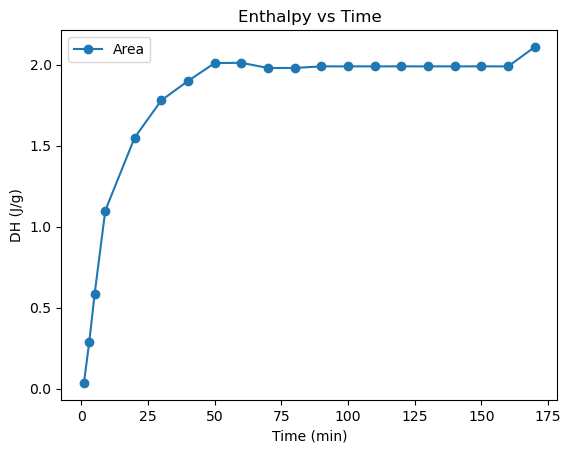

In [6]:
# Plot 
df.plot(x='time', y='Area', marker='o', linestyle='-')
plt.xlabel('Time (min)')
plt.ylabel('DH (J/g)')
plt.title('Enthalpy vs Time')
plt.show()

Provide an initial guess for the parameters (DHinf, k, tzero, and n). This is necessary for the optimization algorithm to start the process. You might base your initial guess on some knowledge of the system or by visually inspecting the data.
Define the Model Function (DH):you start with a model function, in your case, DH(t, DHinf, k, tzero, n).
Collect Experimental Data: you have experimental data, represented by arrays t_data and a_data (a_data=DH)

DH[t_] := DHinf*(1 - Exp[-(k (t - tzero))^n])
4 initial guesses (DHinf, k, t zero, n)

In [7]:
t_data = np.array(df['time'])
a_data = np.array(df['Area'])

# Define the DH function
def DH(t_data, DHinf, k, tzero, n):
    return DHinf * (1 - np.exp(-k * np.abs(t_data - tzero)**n))
# ou need to provide an initial guess for the parameters (DHinf, k, tzero, and n). This is necessary for the curve fitting algorithm to start the optimization process. You might base your initial guess on some knowledge of the system or by visually inspecting the data.
initial_guess = (0.1, 0.8, 0.3, 1)

The curve_fit function adjusts the parameters of your model function to best fit the experimental data. It minimizes the difference between the observed data and the values predicted by the model.

In [8]:
# Fit the function to the data
from scipy.optimize import curve_fit

#scipy.optimize.curve_fit(f, xdata, ydata, p0=None)
params, covariance = curve_fit(DH, t_data, a_data, p0=initial_guess)

# Fitted parameters estraction 
DHinf_fit, k_fit, tzero_fit, n_fit = params

# Print the fitted parameters
print("Fitted DHinf:", DHinf_fit)
print("Fitted k:", k_fit)
print("Fitted tzero:", tzero_fit)
print("Fitted n:", n_fit)

Fitted DHinf: 2.0042750493855723
Fitted k: 0.10694033818946892
Fitted tzero: 1.2277910622916928
Fitted n: 0.9186643785799377


In [9]:
print(covariance)

[[ 1.64843250e-04  2.20003667e-05  2.75215430e-05 -1.78641362e-04]
 [ 2.20003667e-05  1.46579418e-04  9.85723208e-04 -4.87178658e-04]
 [ 2.75215430e-05  9.85723208e-04  2.90857695e-02 -2.46099692e-03]
 [-1.78641362e-04 -4.87178658e-04 -2.46099692e-03  1.89429767e-03]]


Elements in the diagonal represent the covariance for each parameter. Off-diagonal you have the interactions between parameters (example k and t_zero).

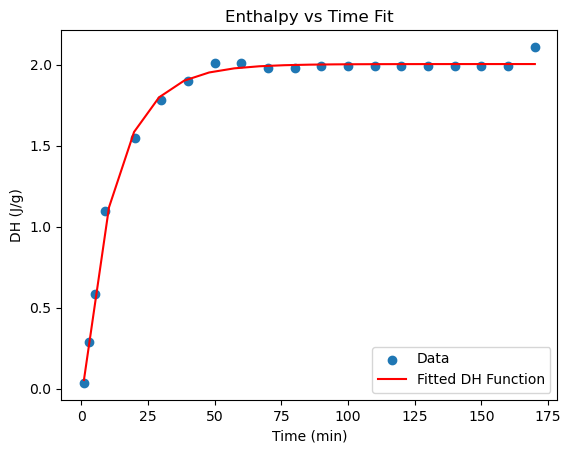

In [10]:
import matplotlib.pyplot as plt
def fitted_DH(t_data):
    return DH(t_data, DHinf_fit, k_fit, tzero_fit, n_fit)

# Plot the original data and the fitted function
plt.scatter(t_data, a_data, label='Data')
t_values = np.linspace(min(t_data), max(t_data), 19)
plt.plot(t_values, fitted_DH(t_values), label='Fitted DH Function', color='red')
plt.xlabel('Time (min)')
plt.ylabel('DH (J/g)')
plt.title('Enthalpy vs Time Fit')
plt.legend()
plt.show()

Linear model => slope calculation => kinetic
Log1minXovXmax = {t - tzero1 /. DH.fit, 
   Log[1 - DH/DHinf1 /. DH_fit]} MATHEMATICA CODE 

In [11]:
x = np.abs(t_data - tzero_fit)
y = np.log(1 - a_data / DHinf_fit)

print(x)
print(y)

[  0.22779106   1.77220894   3.77220894   7.77220894  18.77220894
  28.77220894  38.77220894  48.77220894  58.77220894  68.77220894
  78.77220894  88.77220894  98.77220894 108.77220894 118.77220894
 128.77220894 138.77220894 148.77220894 158.77220894 168.77220894]
[-0.01812487 -0.15629214 -0.34506576 -0.79590413 -1.48433485 -2.19016451
 -2.95600559         nan         nan -4.41358865 -4.41358865 -4.94452449
 -4.94452449 -4.94452449 -4.94452449 -4.94452449 -4.94452449 -4.94452449
 -4.94452449         nan]


C:\Users\20224751\AppData\Local\Temp\ipykernel_18244\2291265782.py:2: RuntimeWarning: invalid value encountered in log
  y = np.log(1 - a_data / DHinf_fit)


In [12]:
def LogDHn(y, k_lin, n_lin):
    return -k_lin * np.abs(x**n_lin)

plt.scatter(x[:10], y[:10], label='Data') for taking the first part of the curve that does not include the plateau (it would lead to a constant line - try yourself by deleting [:10])
The function LogDH takes as input parameters related to time (t_data) and fitted parameters (DHinf_fit, k_fit, tzero_fit, n_fit). It calculates two arrays, x and y, and returns them.
t_data: Input data related to time.
DHinf_fit, k_fit, tzero_fit, n_fit: Fitted parameters used in the calculations.
Inside the function:

x = (t_data - tzero_fit): Calculates the array x by subtracting tzero_fit from each element of t_data.

y = np.log(1 - a_data / DHinf_fit): Calculates the array y by performing element-wise operations on a_data and DHinf_fit, then taking the natural logarithm (np.log).

return x, y: Returns the arrays x and y as a tuple.

Log(1-DH/DHmax) = Log(1-a_data/DHinf_fit) 


np.polyfit: This function is used for polynomial fitting. It calculates the coefficients of a polynomial that best fits a set of data points in a least-squares sense.
np.poly1d: This function is used to create a polynomial object from a given set of coefficients. 

In [14]:
print(k_lin_fit)
print(n_lin_fit)

NameError: name 'k_lin_fit' is not defined

Text(0.5, 1.0, 'Linear fit')

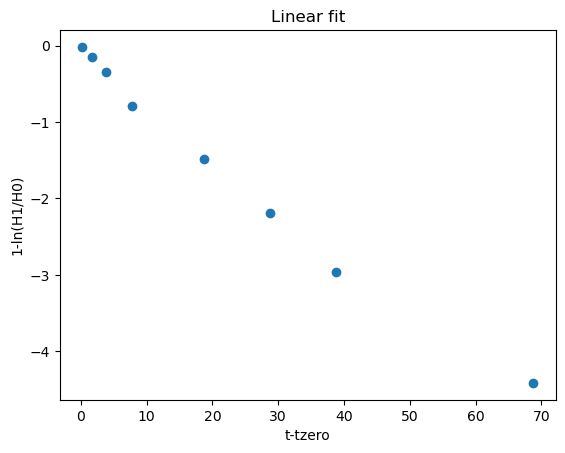

In [15]:
plt.scatter(x[:10], y[:10], label='Data')
plt.xlabel('t-tzero')
plt.ylabel('1-ln(H1/H0)')
plt.title('Linear fit')

Text(0.5, 1.0, 'Linear fit')

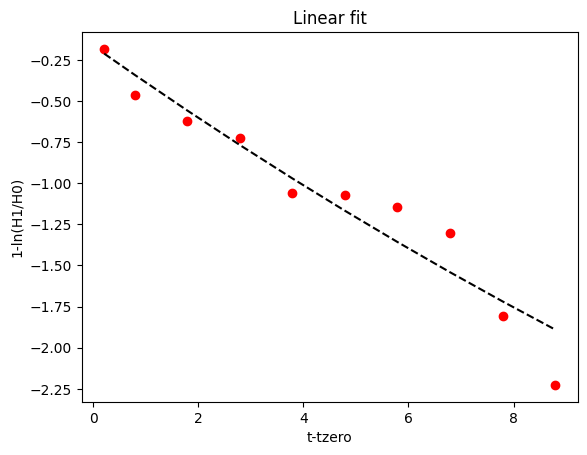

In [27]:
plt.plot(x[:10],y[:10], 'ro', x[:10], poly1d_fn(x)[:10], '--k') 
plt.xlabel('t-tzero')
plt.ylabel('1-ln(H1/H0)')
plt.title('Linear fit')